#  Dimensionality Reduction with PCA

In [3]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [4]:
# Import custom class
%run -i '../src/helper/transfxn.py'

## Load data

In [5]:
df = pd.read_csv('../data/ml_data.csv')
print('Data size before pre-processing:',df.shape)
df.head()

Data size before pre-processing: (3817613, 23)


,c_year,c_mnth,c_wday,c_hour,fatal,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user,c_case
0,1999,January,Monday,9.0,0,2.0,other,At an intersection,Clear and sunny,Normal,...,Light Duty Vehicle,1992.0,1.0,F,33.0,Driver,Injury,Safety device used,Motor Vehicle Driver,2890
1,1999,January,Monday,9.0,0,2.0,other,At an intersection,Clear and sunny,Normal,...,Light Duty Vehicle,1992.0,1.0,F,70.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,2890
2,1999,January,Monday,20.0,0,1.0,other,Intersection with parking lot entrance,Clear and sunny,Normal,...,Light Duty Vehicle,1988.0,1.0,F,38.0,Driver,Injury,Safety device used,Motor Vehicle Driver,4332
3,1999,January,Monday,5.0,0,2.0,other,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,1.0,M,34.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,5053
4,1999,January,Monday,5.0,0,2.0,other,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,2.0,M,30.0,Front row,No Injury,Safety device used,Motor Vehicle Passenger,5053


In [6]:
# Shuffle data
df = df.sample(frac = 1).reset_index(drop = True)

## Create feature matrix & class label

In [8]:
# Feature matrix and class variable
X, y = df.drop(['fatal'], axis = 1), df['fatal']

In [9]:
# Relabel the class variable
y = y.map({0:'Non-fatal', 1: 'Fatal'})

## Transformation pipeline

In [10]:
# Instantiate the class
transfxn = TransformationPipeline()

In [13]:
# Transform and scale data
X_scaled, _,_ = transfxn.preprocessing(X, X)

In [14]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (3817613, 89)


## PCA plot

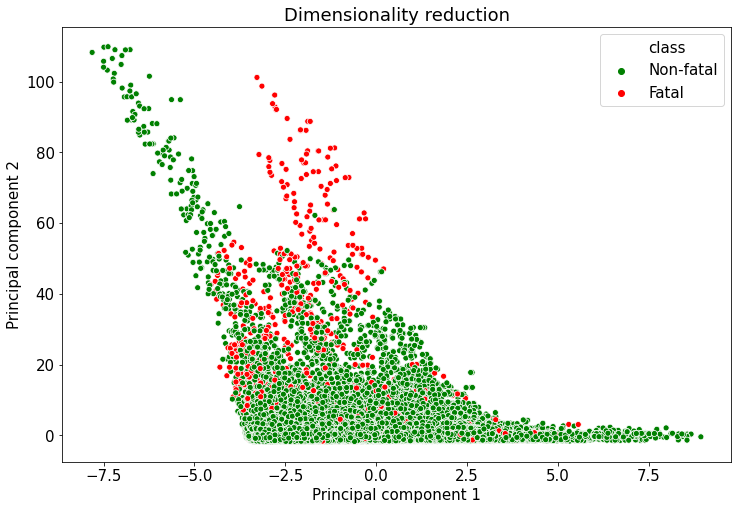

This cell took 2.491312535603841 mins to run


In [16]:
t0 = time.time()

transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])
print('This cell took {} mins to run'.format((time.time()-t0)/60))